## Import

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [101]:
def etude_fichier(df):
    # Etude du fichier 
    print("Nombre de colonnes :", df.shape)
    print()
    print("Le type est : \n", df.dtypes)
    print()
    print('Nombre de unique')
    print(df.nunique())
    print()
    print('le nombre de null est :\n',df.isnull().sum())

In [102]:
customers = pd.read_csv('customersv2.csv', delimiter=';')
transactions = pd.read_csv('Transactionsv2.csv',delimiter=';')
products = pd.read_csv('productsv2.csv',delimiter=';')

## customers

In [103]:
customers.head()

,52,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [104]:
etude_fichier(customers)

Nombre de colonnes : (8621, 3)

Le type est : 
 52       object
sex      object
birth     int64
dtype: object

Nombre de unique
52       8621
sex         2
birth      76
dtype: int64

le nombre de null est :
 52       0
sex      0
birth    0
dtype: int64


In [105]:
customers.rename(columns={'52' : 'client_id'}, inplace=True)

## transactions

In [106]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [107]:
etude_fichier(transactions)

Nombre de colonnes : (687534, 4)

Le type est : 
 id_prod       object
date          object
session_id    object
client_id     object
dtype: object

Nombre de unique
id_prod         3265
date          687419
session_id    345505
client_id       8600
dtype: int64

le nombre de null est :
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


## products

In [108]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [109]:
etude_fichier(products)

Nombre de colonnes : (3286, 3)

Le type est : 
 id_prod     object
price      float64
categ        int64
dtype: object

Nombre de unique
id_prod    3286
price      1454
categ         3
dtype: int64

le nombre de null est :
 id_prod    0
price      0
categ      0
dtype: int64


## Liaison

In [110]:
df = pd.merge(products, transactions, on='id_prod', how='left')

In [111]:
dft = pd.merge(df, customers, on='client_id',how='left')

## DFT

In [112]:
dft.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972.0
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967.0
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,f,1936.0
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,f,1989.0
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,m,1981.0


In [113]:
etude_fichier(dft)

Nombre de colonnes : (687555, 8)

Le type est : 
 id_prod        object
price         float64
categ           int64
date           object
session_id     object
client_id      object
sex            object
birth         float64
dtype: object

Nombre de unique
id_prod         3286
price           1454
categ              3
date          687419
session_id    345505
client_id       8600
sex                2
birth             76
dtype: int64

le nombre de null est :
 id_prod        0
price          0
categ          0
date          21
session_id    21
client_id     21
sex           21
birth         21
dtype: int64


In [114]:
# Conversion de la colonne "birth" en format année
dft['birth'] = pd.to_numeric(dft['birth'], errors='coerce').astype(pd.Int64Dtype()) # Convertir en type entier
# Convertir la colonne "date" en format de date
dft['date'] = pd.to_datetime(dft['date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
# Calcul de l'âge
current_year = datetime.now().year
dft['age'] = current_year - dft['birth']

# Affichage des résultats
print(dft['age'])


0         51
1         56
2         87
3         34
4         42
          ..
687550    35
687551    36
687552    34
687553    34
687554    34
Name: age, Length: 687555, dtype: Int64


In [115]:
# Définition des intervalles d'âge
intervalles = [0, 18, 30, 40, 50, 60, 70, float('inf')]
tranche = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '70+']

# Création de la colonne "age_group" avec les tranches d'âge
dft['tranche'] = pd.cut(dft['age'], bins=intervalles, labels=tranche, right=False)

# Affichage des résultats
print(dft['tranche'])

0         51-60
1         51-60
2           70+
3         31-40
4         41-50
          ...  
687550    31-40
687551    31-40
687552    31-40
687553    31-40
687554    31-40
Name: tranche, Length: 687555, dtype: category
Categories (7, object): ['0-18' < '19-30' < '31-40' < '41-50' < '51-60' < '61-70' < '70+']


In [116]:
dft.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,tranche
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,51,51-60
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967,56,51-60
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,f,1936,87,70+
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,f,1989,34,31-40
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,m,1981,42,41-50


In [117]:
dft.corr()

,price,categ,birth,age
price,1.000000,0.669324,0.207496,-0.207496
categ,0.669324,1.000000,0.098294,-0.098294
birth,0.207496,0.098294,1.000000,-1.000000
age,-0.207496,-0.098294,-1.000000,1.000000


In [118]:
from scipy.stats import chi2_contingency

# Création d'une table de contingence entre le genre et la catégorie
# La table de contingence vous permet de visualiser la répartition des achats de livres par catégorie en fonction du genre des clients
contingency_table = pd.crosstab(dft['sex'], dft['categ'])

# Application du test du chi carré
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Affichage du résultat
print("Test du chi carré :")
print("Chi carré :", chi2)
print("p-value :", p_value)


Test du chi carré :
Chi carré : 158.25417617304882
p-value : 4.320582228399707e-35


In [124]:
contingency_table

categ,0,1,2
sex,,,
f,206103,119307,17283
m,209356,116285,19200


Le test du chi carré compare les fréquences observées dans chaque cellule de la table de contingence avec les fréquences attendues calculées sous l'hypothèse nulle d'indépendance entre les variables. La différence entre les fréquences observées et attendues est exprimée en utilisant la formule du chi carré.

La p-value (valeur p) est le résultat du test du chi carré. Elle représente la probabilité d'obtenir des résultats aussi extrêmes que ceux observés, sous l'hypothèse nulle d'indépendance entre les variables. En d'autres termes, la p-value mesure la force des preuves contre l'hypothèse nulle.

# consigne

5 corrélations :
- le lien entre le genre d'un client et les catégories de livres achetées
- le lien entre l'âge des clients et le montant total des achats
- le line entre l'age des clients et la fréquence d'achet
- le lien entre l'agedes cleitns et la paille du paneir moyen
- le lien entre l'age et la catégorie de libvre achets

ghrhaîque du CA : 
- évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance golbale
- un zoom sur les réfrences pour voir top et flop, répartition par catégorie, etc
- info sur les profils de nos clients, répartition du ca entre eux, courbe de lorenz

In [125]:
# Regrouper les données par mois et calculer le chiffre d'affaires total par mois
vente_mois = dft.groupby(pd.Grouper(key='date', freq='M')).sum()['price']
vente_mois

date
2021-03-31    482440.61
2021-04-30    476109.30
2021-05-31    492943.47
2021-06-30    484088.56
2021-07-31    482835.40
2021-08-31    482284.79
2021-09-30    507240.68
2021-10-31    489743.61
2021-11-30    516167.73
2021-12-31    525917.28
2022-01-31    525338.99
2022-02-28    535571.50
2022-03-31    515456.53
2022-04-30    492998.94
2022-05-31    517132.60
2022-06-30    496016.12
2022-07-31    510783.12
2022-08-31    506467.27
2022-09-30    494114.53
2022-10-31    507917.77
2022-11-30    496664.94
2022-12-31    510219.50
2023-01-31    517540.55
2023-02-28    456679.76
Name: price, dtype: float64

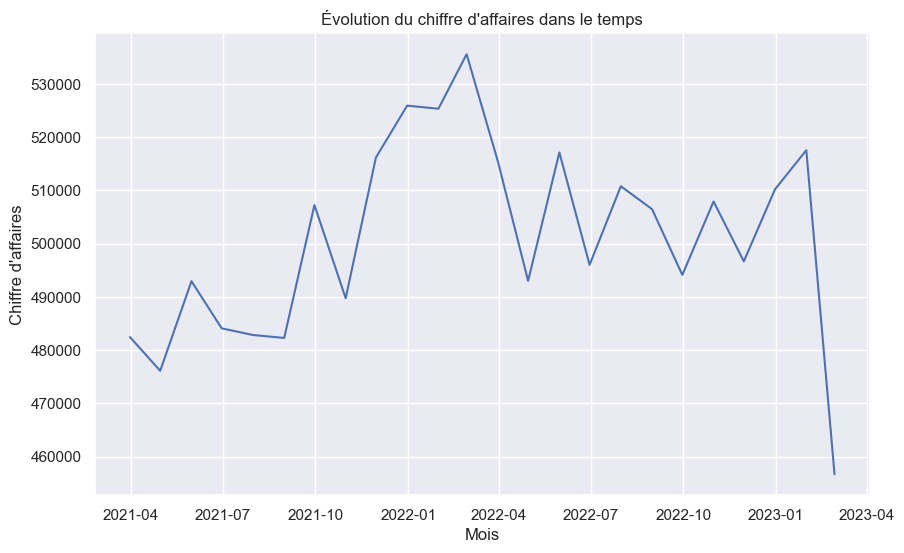

In [126]:
# Tracer l'évolution du chiffre d'affaires dans le temps
plt.figure(figsize=(10, 6))
plt.plot(vente_mois.index, vente_mois.values)
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires')
plt.title('Évolution du chiffre d\'affaires dans le temps')
plt.show()

La moyenne mobile, ou moyenne glissante, est un type de moyenne statistique utilisée pour analyser des séries ordonnées de données, le plus souvent des séries temporelles, en supprimant les fluctuations transitoires de façon à en souligner les tendances à plus long terme. Cette moyenne est dite mobile parce qu'elle est recalculée de façon continue,

<Figure size 1000x800 with 0 Axes>

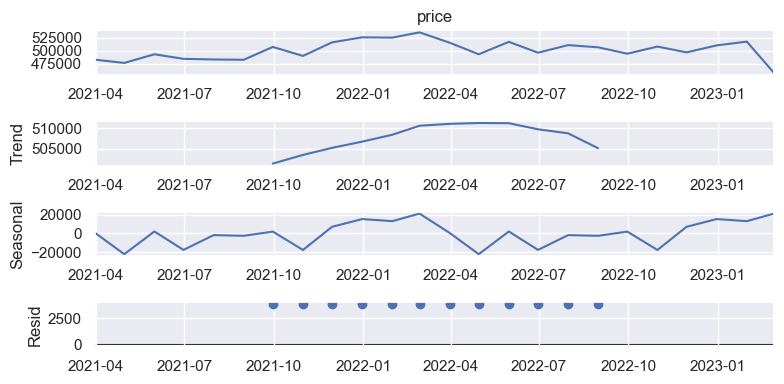

In [127]:
# Décomposition en moyenne mobile (par exemple, moyenne mobile simple sur 12 mois)
rolling_mean = vente_mois.rolling(window=12).mean()
# Tracer la décomposition en moyenne mobile
decomposition = seasonal_decompose(vente_mois, model='additive')
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()

In [132]:
# Load packages
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
# Plot settings
%config InlineBackend.figure_format='retina'
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = 12, 9  # Figure size (width,height)

# Perform time series decompositon
decomposition = dft.tsa.seasonal_decompose(df)

# Plot decomposition
fig = decomposition.plot()

# Specify axis labels
plt.xlabel("Date", fontsize=12)  # Text and size of xlabel
plt.suptitle(
    "CO2 Time-Series Decomposition",  # Text of title
    y=1.05,  # Position of title
    size=15,  # Size of title
)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'tsa'

Références les plus vendues :
 id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    56617.47
1_369    56136.60
2_110    53846.25
1_383    53834.43
1_414    53522.18
Name: price, dtype: float64
Références les moins vendues :
 id_prod
0_1620    0.80
0_1539    0.99
0_1014    1.15
0_1284    1.38
0_1780    1.67
0_310     1.94
0_1653    1.98
0_1601    1.99
0_541     1.99
0_807     1.99
Name: price, dtype: float64


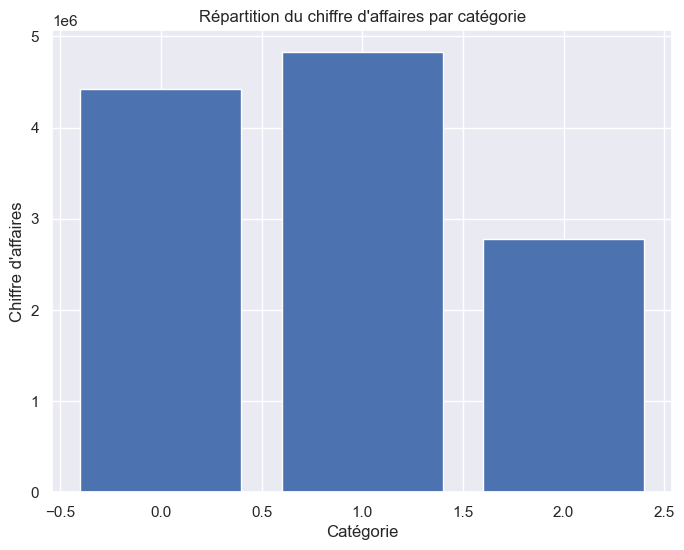

In [122]:
# Références les plus vendues (top)
top_references = dft.groupby('id_prod').sum()['price'].nlargest(10)
print('Références les plus vendues :\n', top_references)

# Références les moins vendues (flop)
flop_references = dft.groupby('id_prod').sum()['price'].nsmallest(10)
print('Références les moins vendues :\n', flop_references)

# Répartition par catégorie
category_sales = dft.groupby('categ').sum()['price']
plt.figure(figsize=(8, 6))
plt.bar(category_sales.index, category_sales.values)
plt.xlabel('Catégorie')
plt.ylabel('Chiffre d\'affaires')
plt.title('Répartition du chiffre d\'affaires par catégorie')
plt.show()

In [123]:
import matplotlib.pyplot as plt

# Regrouper les clients par catégorie et calculer le chiffre d'affaires par catégorie
client_category_sales = dft.groupby('catégorie')['chiffre_affaires'].sum()

# Tracer la répartition du chiffre d'affaires par catégorie
plt.figure(figsize=(10, 6))
plt.bar(client_category_sales.index, client_category_sales.values)
plt.xlabel('Catégorie de clients')
plt.ylabel('Chiffre d\'affaires')
plt.title('Répartition du chiffre d\'affaires par catégorie de clients')
plt.show()


KeyError: 'catégorie'

In [128]:
# CA total par client
client_sales = dft.groupby('client_id').sum()['price']

In [129]:
# Répartition du CA entre les clients
plt.figure(figsize=(12, 6))
plt.bar(client_sales.index, client_sales.values)
plt.xlabel('Client')
plt.ylabel('Chiffre d\'affaires')
plt.title('Répartition du chiffre d\'affaires par client')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Courbe de Lorenz
cumulative_sales = client_sales.sort_values().cumsum() / client_sales.sum()
lorenz_curve = pd.Series(cumulative_sales.values, index=range(1, len(cumulative_sales) + 1))
plt.figure(figsize=(6, 6))
plt.plot(lorenz_curve.index, lorenz_curve.values, label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Égalité parfaite')
plt.xlabel('Pourcentage de clients')
plt.ylabel('Pourcentage de chiffre d\'affaires')
plt.title('Courbe de Lorenz du chiffre d\'affaires')
plt.legend()
plt.show()
